In [202]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree


In [203]:
#import Data
filepath = 'Loans_dataset (1).csv'

loans_df= pd.read_csv(filepath)
loans_df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [204]:
#Clean the Data
#Check for Nulls in columns
print(loans_df.isnull().sum())


initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64


In [205]:
#Describe Data
loans_df.describe()
#No Nans or 0 values, so all data appears to be present
#Also wth is a 997 credit score, this dude is cheating
loans_df.duplicated().sum()

0

In [206]:
# Label encoding, turn the yes/no into a binary value
le = LabelEncoder()
loans_df['result']= le.fit_transform(loans_df['result'])
loans_df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,1
1,205,10016,395,3044,13660,1
2,257,10129,109,3251,13746,1
3,246,10064,324,3137,13771,1
4,117,10115,496,3094,13822,1


In [207]:
#House number seems like an identifying piece of data, and not a numeric value that should be used in the ML model. Afterall, the number of the house doesn't determing the loan repayment
#I'm donna drop this column
loans_df.drop(columns=['house_number'], inplace=True)
loans_df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,1
1,205,10016,395,13660,1
2,257,10129,109,13746,1
3,246,10064,324,13771,1
4,117,10115,496,13822,1


In [208]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   initial_payment  1004 non-null   int64
 1   last_payment     1004 non-null   int64
 2   credit_score     1004 non-null   int64
 3   sum              1004 non-null   int64
 4   result           1004 non-null   int32
dtypes: int32(1), int64(4)
memory usage: 35.4 KB


In [209]:
#Check for corellation matrix

correlation_matrix = loans_df.corr()
print(correlation_matrix)

                 initial_payment  last_payment  credit_score       sum  \
initial_payment         1.000000     -0.013536     -0.009421  0.050698   
last_payment           -0.013536      1.000000     -0.000805  0.213237   
credit_score           -0.009421     -0.000805      1.000000  0.068387   
sum                     0.050698      0.213237      0.068387  1.000000   
result                 -0.048464     -0.805640     -0.076326 -0.092830   

                   result  
initial_payment -0.048464  
last_payment    -0.805640  
credit_score    -0.076326  
sum             -0.092830  
result           1.000000  


<Axes: >

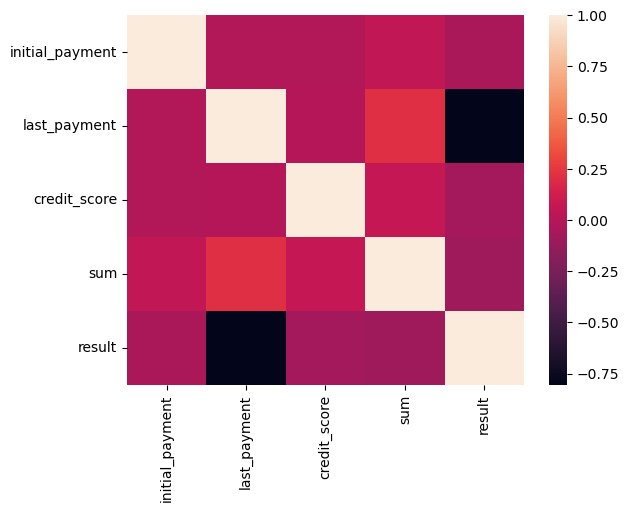

In [210]:
loans_df.corr()
sns.heatmap(loans_df.corr())

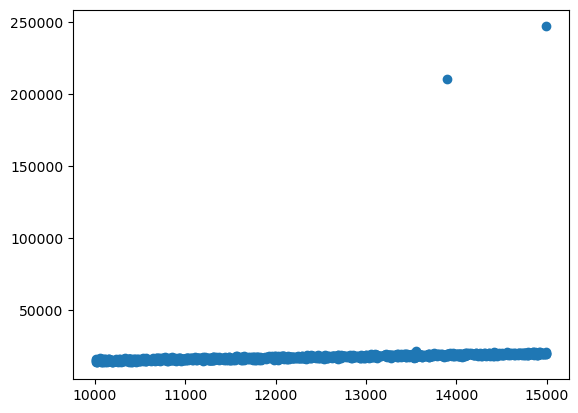

In [211]:
#Highest value not including the result column of DF is sum and last payment, so we will use those as our variables
#Initial payment has a very slight effect, as does result
plt.scatter(loans_df['last_payment'], loans_df['sum'])


In [212]:
# Prepare independent and dependent variables
y = loans_df['result'].values
X = loans_df.drop(columns=['result']).values

In [213]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

In [214]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
# Train Decision Tree Classifier
DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=4, min_samples_leaf=5)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=36)

In [216]:

# Make predictions
y_pred = classifier.predict(X_test)

In [217]:

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.9960159362549801
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      1.00       123

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251

Confusion Matrix:
[[127   1]
 [  0 123]]


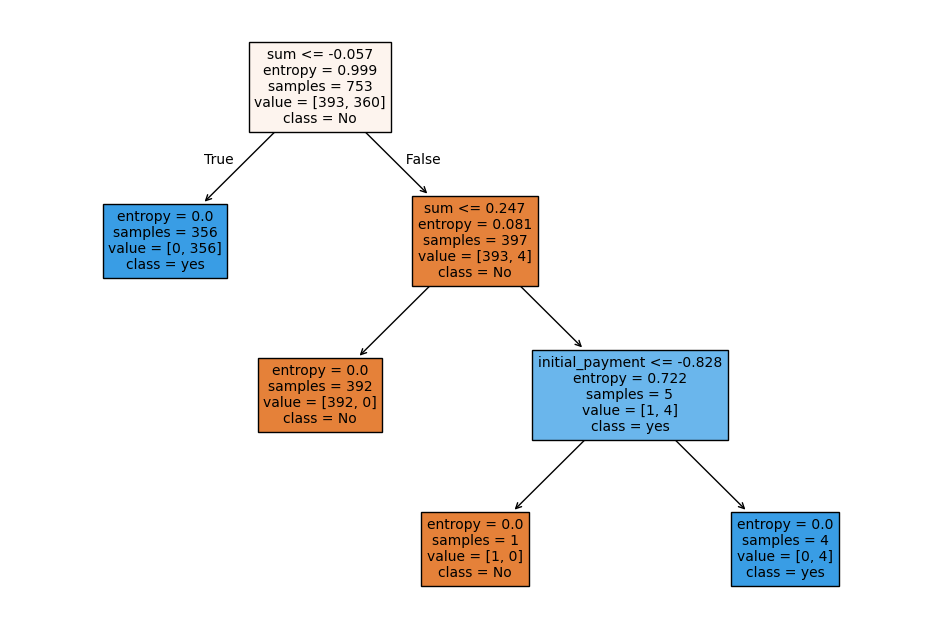

In [224]:
# Plot the trained decision tree
plt.figure(figsize=(12, 8))  # Optional: specify figure size
plot_tree(classifier, 
          filled=True, 
          feature_names=loans_df.drop(columns=['result']).columns,  # feature names
          class_names=le.classes_,
          fontsize=10
         )
plt.show()
